Supervised Learning

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC

In [47]:
df = pd.read_csv('HIV_AIDS.csv',delimiter=';')
df.head(3)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011.0,All,All,All,All,All,3379.0,02/01/1900 00.03,640,66,2366,33.08.00,1.01,71,2040,13.06,05.08,07.08
1,2011.0,All,All,Male,All,All,NaN,79.01.00,480,66,1712,52.02.00,1.07,72,1423,13.04,05.07,07.07
2,2011.0,All,All,Female,All,All,733.0,21.01,153,66,622,17.06,0.06,68,605,14,6,8


Scaling

In [50]:
mm = MinMaxScaler()
X_train= mm.fit_transform(X_train)
X_test= mm.transform(X_test)

In [51]:
y_test.unique()

array([1, 0, 2])

In [52]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [53]:
le.inverse_transform([0])

array([0])

In [54]:
svm = SVC(kernel = "linear")# Buat objek classifier (model) SVM
svm.fit(X_train, y_train)# Latih classifier (model) dengan data train

SVC(kernel='linear')

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn.predict(X_test)# Lakukan prediksi data test dengan model

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [59]:
cm = confusion_matrix(y_test, y_pred)

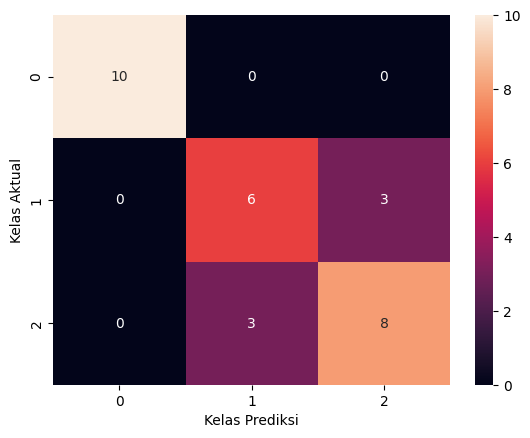

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True)
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

In [61]:
akurasi = accuracy_score(y_test,y_pred)
akurasi

0.8

In [65]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



REGRESI

In [70]:
df = pd.read_csv('HIV_AIDS.csv',delimiter=';')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              6003 non-null   float64
 1   Borough                           6005 non-null   object 
 2   UHF                               6005 non-null   object 
 3   Gender                            6005 non-null   object 
 4   Age                               6005 non-null   object 
 5   Race                              6005 non-null   object 
 6   HIV diagnoses                     6003 non-null   float64
 7   HIV diagnosis rate                6005 non-null   object 
 8   Concurrent diagnoses              6005 non-null   int64  
 9   % linked to care within 3 months  6005 non-null   int64  
 10  AIDS diagnoses                    6005 non-null   int64  
 11  AIDS diagnosis rate               6005 non-null   object 
 12  PLWDHI

In [73]:
df.head(3)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011.0,All,All,All,All,All,3379.0,02/01/1900 00.03,640,66,2366,33.08.00,1.01,71,2040,13.06,05.08,07.08
1,2011.0,All,All,Male,All,All,NaN,79.01.00,480,66,1712,52.02.00,1.07,72,1423,13.04,05.07,07.07
2,2011.0,All,All,Female,All,All,733.0,21.01,153,66,622,17.06,0.06,68,605,14,6,8


In [77]:
X = df[['Concurrent diagnoses','AIDS diagnoses','% linked to care within 3 months']]
y = df['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# Bagi data (split) ke train set dan test set

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [79]:
lr.fit(X_train,y_train)# Latih  dengan data train

LinearRegression()

In [80]:
y_pred = lr.predict(X_test)# Lakukan prediksi data test dengan model

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [82]:
import numpy as np
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 27.67352151943996
MSE : 2209.610482180568
RMSE : 47.00649404263807
R-Squared : -0.06781523923461563


Unsupervised Learning

In [85]:
from sklearn.cluster import KMeans